In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from scipy.integrate import solve_ivp
from joblib import Parallel, delayed
from scipy.integrate import odeint
import math
import random
import itertools

/home/anagha/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
num_of_nodes = 3
possible_initial_conditions = []
l = list(itertools.product([0, 1], repeat=num_of_nodes))
for i in range(len(l)):
    possible_initial_conditions.append(list(l[i]))  
    
possible_initial_conditions = np.array(possible_initial_conditions) 

In [148]:
possible_initial_conditions[5,:]


array([1, 0, 1])

In [3]:


def update_states(states, adjacency_matrix):
    new_states = [0] * len(states)

    for j in range(len(states)):
        input_sum = 0
        for i in range(len(states)):
            connection = adjacency_matrix[i][j]
            if connection == 1:
                input_sum += states[i]
            elif connection == -1:
                input_sum += int(not states[i])
            # if 0, it does not change the input sum

        
        new_states[j] = 1 if input_sum > 1 else 0

    return new_states

#---------------------------------------------------------------------------------------------------------

def run_simulation(initial_states, adjacency_matrix, max_iterations=10):
    states = initial_states[:]
    history = [states]
    
    for iteration in range(1,max_iterations+1):
        new_states = update_states(states, adjacency_matrix)
        #print(f"Iteration {iteration}: {new_states}")

        if new_states == states:
            
            #print("Reached stable state.")
            break
        states = new_states
        history.append(states)

    #print(history)
    return history

#--------------------------------------------------------------------------------------------------------------


def all_attractors(adjacency_matrix):
    #print(adjacency_matrix)
    end_results = []
    for i in range(len(possible_initial_conditions)):
        history = run_simulation(list(possible_initial_conditions[i,:]), adjacency_matrix)
        
        hiss = np.array(history)
        end_results.append(list(hiss[-1,:]))
        #print(list(possible_initial_conditions[i,:]))
    unique_end_results = np.unique(np.array(end_results), axis=0)   
    return unique_end_results


In [168]:
adj_matrix = [
    [1,  1, 1],
    [1,  1,  1],
    [1, 1,  1]
]
initial_states = [0,1,1]
run_simulation(initial_states, adj_matrix)

[[0, 1, 1], [1, 1, 1]]

In [104]:
adj_matrix = [
    [1,  1, 1],
    [1,  1,  1],
    [1, 1,  1]
]

end_results = []
for i in range(len(possible_initial_conditions)):
    run_simulation(list(possible_initial_conditions[i,:]), adj_matrix)
    hiss = np.array(history)
    end_results.append(list(hiss[-1,:]))
    
unique_end_results = np.unique(np.array(end_results), axis=0)   
    

In [176]:
adj_matrix = [
    [-1,  0, 0],
    [1,  1,  1],
    [0,  1,  1]
]


all_attractors(adj_matrix)

[[-1, 0, 0], [1, 1, 1], [0, 1, 1]]


array([[0, 0, 0],
       [0, 1, 1],
       [1, 1, 1]])

In [179]:
results = []
all_combinations = list(itertools.product([-1, 0, 1], repeat=9))
for i in range(20):
    combination = all_combinations[i]
    adjacency_matrix_used = np.array(combination).reshape(3, 3)
    #print(adjacency_matrix_used)
    result_array = all_attractors(adjacency_matrix_used)
    print(result_array)
    results.append(result_array)

[[0 0 0]
 [1 1 1]]
[[0 0 0]
 [1 1 1]]
[[0 0 0]
 [1 1 1]]
[[0 0 0]
 [1 1 1]]
[[0 0 0]
 [1 0 0]
 [1 1 1]]
[[0 0 0]
 [1 0 0]
 [1 1 1]]
[[0 0 0]
 [0 1 0]
 [1 0 1]
 [1 1 1]]
[[0 0 0]
 [1 0 0]
 [1 1 1]]
[[0 0 0]
 [0 1 1]
 [1 0 0]
 [1 1 1]]
[[0 0 0]
 [1 1 1]]
[[0 0 0]
 [0 1 0]
 [1 1 1]]
[[0 0 0]
 [0 1 0]
 [1 1 1]]
[[0 0 0]
 [1 1 1]]
[[0 0 0]
 [1 1 1]]
[[0 0 0]
 [1 1 1]]
[[0 0 0]
 [1 1 1]]
[[0 0 0]
 [1 1 1]]
[[0 0 0]
 [0 1 1]
 [1 1 1]]
[[0 0 0]
 [0 1 1]
 [1 0 0]
 [1 1 1]]
[[0 0 0]
 [0 1 0]
 [1 1 1]]


In [4]:
results = []
all_combinations = list(itertools.product([-1, 0, 1], repeat=9))
for combination in all_combinations:
    adjacency_matrix_used = np.array(combination).reshape(3, 3)
    result_array = all_attractors(adjacency_matrix_used)
    results.append(result_array)

    
    

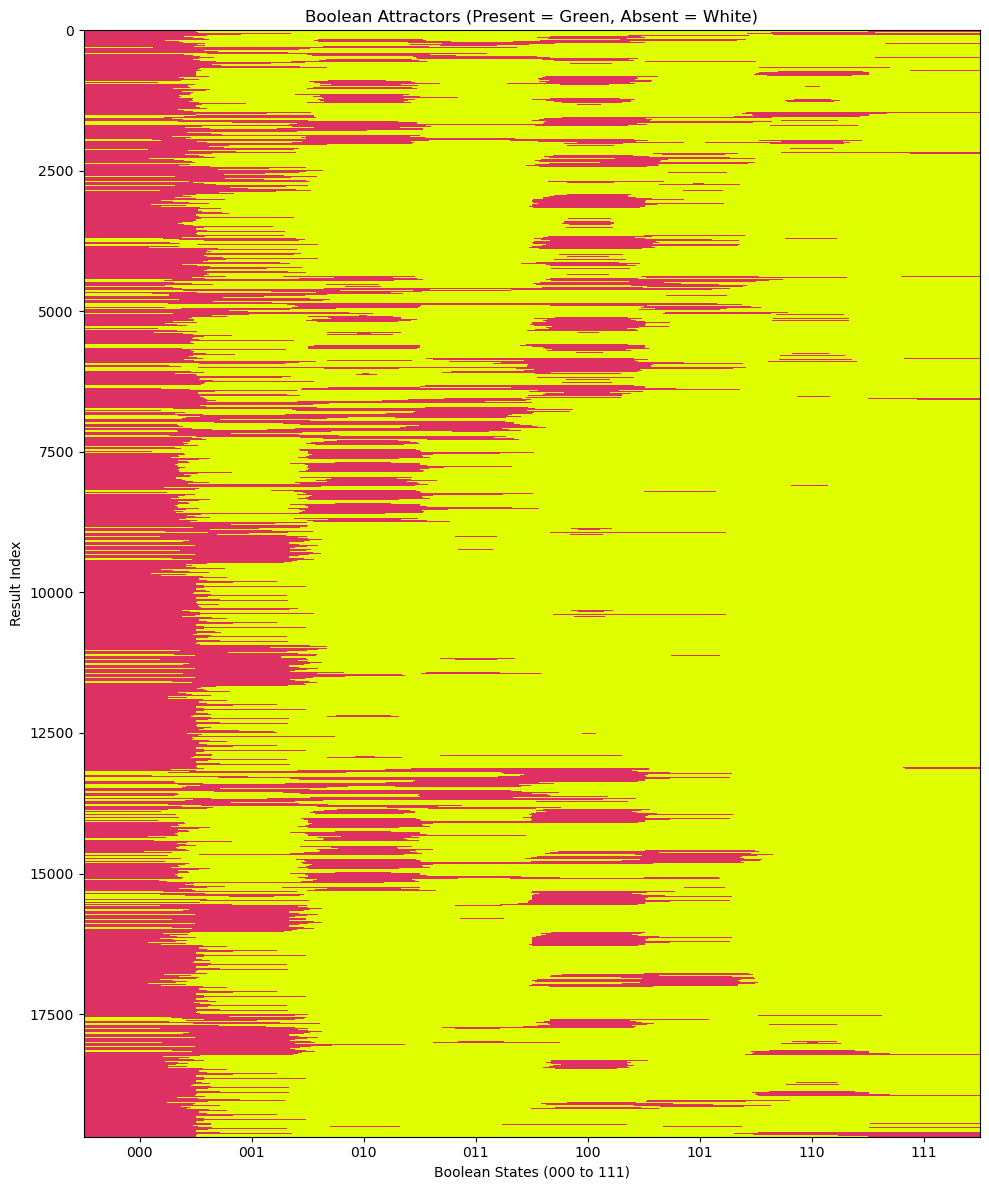

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create binary heatmap data
heatmap_data = np.zeros((len(results), 8))

def binary_to_int(binary_array):
    return int("".join(str(int(b)) for b in binary_array), 2)

for i, array in enumerate(results):
    for row in array:
        idx = binary_to_int(row)
        heatmap_data[i, idx] = 1

# Define a discrete colormap: white for 0, green for 1
cmap = ListedColormap(['#DFFF00', '#DE3163'])
# Plot
plt.figure(figsize=(10, 12))
plt.imshow(heatmap_data, aspect='auto', cmap=cmap)
plt.xlabel("Boolean States (000 to 111)")
plt.ylabel("Result Index")
plt.title("Boolean Attractors (Present = Green, Absent = White)")
plt.xticks(ticks=range(8), labels=[f"{i:03b}" for i in range(8)])
plt.tight_layout()
plt.show()


In [4]:
def run_simulation_with_cycle_detection(initial_states, adjacency_matrix, max_iterations=20):
    states = initial_states[:]
    history = [states]
    
    for iteration in range(max_iterations):
        new_states = update_states(states, adjacency_matrix)

        if new_states in history:
            # Found a cycle
            cycle_start = history.index(new_states)
            cycle = history[cycle_start:]
            return {
                "type": "cycle",
                "cycle": cycle,
                "cycle_length": len(cycle)
            }

        if new_states == states:
            # Reached a fixed point
            return {
                "type": "fixed",
                "state": new_states
            }

        history.append(new_states)
        states = new_states

    return {
        "type": "unknown",
        "history": history
    }


In [5]:
def find_oscillators(adjacency_matrix):
    oscillators = []

    for i in range(len(possible_initial_conditions)):
        initial_state = list(possible_initial_conditions[i, :])
        result = run_simulation_with_cycle_detection(initial_state, adjacency_matrix)

        if result["type"] == "cycle":
            oscillator_info = {
                "initial_state": initial_state,
                "cycle": result["cycle"],
                "cycle_length": result["cycle_length"]
            }
            oscillators.append(oscillator_info)

    return oscillators


In [7]:
oscillator_results = []
all_combinations = list(itertools.product([-1, 0, 1], repeat=9))
for combination in all_combinations:
    adjacency_matrix_used = np.array(combination).reshape(3, 3)
    oscillators = find_oscillators(adjacency_matrix_used)

    if oscillators:  # Only keep matrices that lead to oscillators
        oscillator_results.append({
            "adjacency_matrix": adjacency_matrix_used,
            "oscillators": oscillators
        })


NameError: name 'update_states' is not defined

In [8]:
import itertools
import numpy as np

# Generate all possible binary initial conditions for 3 nodes
num_of_nodes = 3
possible_initial_conditions = np.array(
    list(itertools.product([0, 1], repeat=num_of_nodes))
)

# Update rule for the network
def update_states(states, adjacency_matrix):
    new_states = [0] * len(states)
    for j in range(len(states)):
        input_sum = 0
        for i in range(len(states)):
            connection = adjacency_matrix[i][j]
            if connection == 1:
                input_sum += states[i]
            elif connection == -1:
                input_sum += int(not states[i])
        new_states[j] = 1 if input_sum > 1 else 0
    return new_states

# Run simulation and detect fixed points or cycles
def run_simulation_with_cycle_detection(initial_states, adjacency_matrix, max_iterations=20):
    states = initial_states[:]
    history = [states]

    for _ in range(max_iterations):
        new_states = update_states(states, adjacency_matrix)

        if new_states in history:
            cycle_start = history.index(new_states)
            cycle = history[cycle_start:]
            return {
                "type": "cycle",
                "cycle": cycle,
                "cycle_length": len(cycle),
                "initial_state": initial_states
            }

        if new_states == states:
            return {
                "type": "fixed",
                "state": new_states,
                "initial_state": initial_states
            }

        history.append(new_states)
        states = new_states

    return {
        "type": "unknown",
        "history": history,
        "initial_state": initial_states
    }

# For a given adjacency matrix, find all oscillators
def find_oscillators(adjacency_matrix):
    oscillators = []
    for i in range(len(possible_initial_conditions)):
        initial_state = list(possible_initial_conditions[i])
        result = run_simulation_with_cycle_detection(initial_state, adjacency_matrix)
        if result["type"] == "cycle":
            oscillators.append(result)
    return oscillators

# Generate all possible 3x3 adjacency matrices with entries in {-1, 0, 1}
all_combinations = list(itertools.product([-1, 0, 1], repeat=9))

# Store only those that produce oscillators
oscillator_results = []

for combination in all_combinations:
    adjacency_matrix = np.array(combination).reshape(3, 3)
    oscillators = find_oscillators(adjacency_matrix)
    if oscillators:
        oscillator_results.append({
            "adjacency_matrix": adjacency_matrix,
            "oscillators": oscillators
        })

# Display results
for entry in oscillator_results:
    print("Adjacency Matrix:")
    print(np.array(entry["adjacency_matrix"]))
    print("Oscillators Found:")
    for osc in entry["oscillators"]:
        print(f"Initial State: {osc['initial_state']} → Cycle: {osc['cycle']} (Length {osc['cycle_length']})")
    print("-" * 50)


Adjacency Matrix:
[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]]
Oscillators Found:
Initial State: [0, 0, 0] → Cycle: [[0, 0, 0], [1, 1, 1]] (Length 2)
Initial State: [0, 0, 1] → Cycle: [[1, 1, 1], [0, 0, 0]] (Length 2)
Initial State: [0, 1, 0] → Cycle: [[1, 1, 1], [0, 0, 0]] (Length 2)
Initial State: [0, 1, 1] → Cycle: [[0, 0, 0], [1, 1, 1]] (Length 2)
Initial State: [1, 0, 0] → Cycle: [[1, 1, 1], [0, 0, 0]] (Length 2)
Initial State: [1, 0, 1] → Cycle: [[0, 0, 0], [1, 1, 1]] (Length 2)
Initial State: [1, 1, 0] → Cycle: [[0, 0, 0], [1, 1, 1]] (Length 2)
Initial State: [1, 1, 1] → Cycle: [[1, 1, 1], [0, 0, 0]] (Length 2)
--------------------------------------------------
Adjacency Matrix:
[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1  0]]
Oscillators Found:
Initial State: [0, 0, 0] → Cycle: [[0, 0, 0], [1, 1, 1]] (Length 2)
Initial State: [0, 0, 1] → Cycle: [[1, 1, 1], [0, 0, 0]] (Length 2)
Initial State: [0, 1, 0] → Cycle: [[0, 0, 0], [1, 1, 1]] (Length 2)
Initial State: [0, 1, 1] → Cycle: [[0, 0, 0], [1, 1, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[ 1  1  1]
 [-1  0  0]
 [ 0  0  0]]
Oscillators Found:
Initial State: [0, 0, 0] → Cycle: [[0, 0, 0]] (Length 1)
Initial State: [0, 0, 1] → Cycle: [[0, 0, 0]] (Length 1)
Initial State: [0, 1, 0] → Cycle: [[0, 0, 0]] (Length 1)
Initial State: [0, 1, 1] → Cycle: [[0, 0, 0]] (Length 1)
Initial State: [1, 0, 0] → Cycle: [[1, 0, 0]] (Length 1)
Initial State: [1, 0, 1] → Cycle: [[1, 0, 0]] (Length 1)
Initial State: [1, 1, 0] → Cycle: [[0, 0, 0]] (Length 1)
Initial State: [1, 1, 1] → Cycle: [[0, 0, 0]] (Length 1)
--------------------------------------------------
Adjacency Matrix:
[[ 1  1  1]
 [-1  0  0]
 [ 0  0  1]]
Oscillators Found:
Initial State: [0, 0, 0] → Cycle: [[0, 0, 0]] (Length 1)
Initial State: [0, 0, 1] → Cycle: [[0, 0, 0]] (Length 1)
Initial State: [0, 1, 0] → Cycle: [[0, 0, 0]] (Length 1)
Initial State: [0, 1, 1] → Cycle: [[0, 0, 0]] (Length 1)
Initial State: [1, 0, 0] → Cycle: [[1, 0, 0]] (Length 1)
Initial State: [1, 0, 1] → Cycle: [[1, 0, 1]] (Length 1)
Initial State: [1, 1,